### 1.导入需要的模块

In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import sklearn
import random
import time
import warnings
warnings.filterwarnings('ignore')

### 2.加载数据建模库

#### 2.1公共算法库

In [2]:
from sklearn import svm,tree,linear_model,neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process
from xgboost import XGBClassifier

#### 2.2辅助模块

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#### 2.3可视化模块

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#### 2.4配置可视化设置

In [5]:
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

### 3.数据预处理

#### 3.1加载数据

In [6]:
data_raw = pd.read_csv('input/train.csv')
data_val = pd.read_csv('input/test.csv')

In [7]:
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
data_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S


#### 3.2分析数据

In [10]:
#查看训练集每列有多少个空字段
print('Train columns with null valules :\n',data1.isnull().sum())
#查看测试集每列有多少个空字段
print('Test/Validation columns with null values:\n', data_val.isnull().sum())
#查看样本总体情况
data_raw.describe(include='all')

Train columns with null valules :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Turpin, Mrs. William John Robert (Dorothy Ann ...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### 3.3清洗数据

处理一些异常值，删除多余特征

In [11]:
for dataset in data_cleaner:
    #用Age的中位数代替Age中的空值
    dataset['Age'].fillna(dataset['Age'].median(),inplace = True)
    #用Embarked中最多数的代替Embarked中的空值
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace = True)
    #用Fare中的中位数代替Fare中的空值
    dataset['Fare'].fillna(dataset['Fare'].median(),inplace = True)

#删除测试集中的PassengerId/Cabin/Ticket列，因为我们认为这些特征对最后的结果没有影响。
data1.drop(['PassengerId','Cabin','Ticket'],axis = 1,inplace = True)

print('Train columns with null valules :\n',data1.isnull().sum())
print('Test/Validation columns with null values:\n', data_val.isnull().sum())

Train columns with null valules :
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


根据现有的特征，创建、合并、修改一些特征，

In [12]:
for dataset in data_cleaner:
    #将SliSp和Parch两个特征，合并成一个特征：FamilySize
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    #根据FamilySize的大小，创建一个新的特征：IsAlone
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize']>1] = 0
    #切分人名，创建特征：Title
    dataset['Title'] = dataset['Name'].str.split(',',expand = True)[1].str.split('.',expand = True)[0]
    #基于分位数的离散化函数。将变量分为基于等级或基于样本分位数的相等大小的桶。
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

对修改之后的Title特征中数量很少的值，用一个新的特征代替：Rare

In [13]:
Rare_name = data1['Title'].value_counts()<10
data1['Title'] = data1['Title'].apply(lambda x:'Rare' if Rare_name.loc[x] == True else x)
print(data1['Title'].value_counts())
data1.sample(10)

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Rare        27
Name: Title, dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
812,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
816,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
136,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,26.2833,S,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
700,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C,2,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
51,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,7.8000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]"
604,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,26.5500,C,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,S,7,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
318,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,164.8667,S,3,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
327,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,13.0000,S,1,1,Mrs,"(7.91, 14.454]","(32.0, 48.0]"


#### 3.4转化数据格式

我们需要把一些非数值特征转化为数值特征。

In [14]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


为划分不同的训练/测试数据集做准备

In [15]:
Target = ['Survived']
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [16]:
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Rare'] 



#### 3.5检查处理过的数据

In [17]:
print('Train columns with null values: \n', data1.isnull().sum())
print('Test/Validation columns with null values: \n', data_val.isnull().sum())
data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
Test/Validation columns with null values: 
 PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Turpin, Mrs. William John Robert (Dorothy Ann ...",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 4.拆分数据集

In [18]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc],data1[Target],random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


### 5.统计分析数据

#### 5.1基于Survived的离散变量相关性分析

In [19]:
data1[['Sex','Survived']].groupby('Sex',as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
#data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
for x in data1_x:
    if data1[x].dtype != 'float64': #因为float64的特征是连续型的。
        print('Survival Correlation by :',x)
        print(data1[[x,Target[0]]].groupby(x,as_index = False).mean())
        print('------------------------------')
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by : Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------------
Survival Correlation by : Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------
Survival Correlation by : Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
------------------------------
Survival Correlation by : Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Rare  0.444444
------------------------------
Survival Correlation by : SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------------
Survival Correlation by : Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.0000

#### 5.2通过绘制图像分析数据

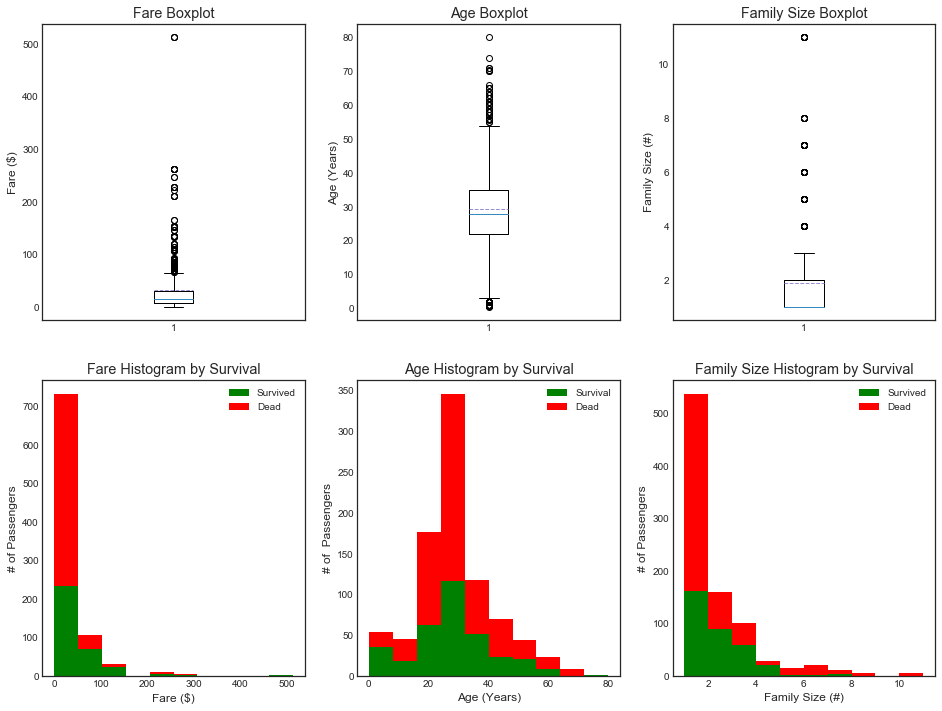

In [21]:
plt.figure(figsize=[16,12])

#Fare的图像分析
plt.subplot(231)
plt.boxplot(x = data1['Fare'],showmeans=True ,meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')
#Age的图像分析
plt.subplot(232)
plt.boxplot(x = data1['Age'],showmeans=True,meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
#FamilySize的图像分析
plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

#Fare关于Survival的直方图
plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend() #说明

#Age关于Survival的直方图
plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'],data1[data1['Survived']==0]['Age']],stacked=True,color=['g','r'],label=['Survival','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of  Passengers')
plt.legend()

#Family关于Survival的直方图
plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

#### 5.3使用seaborn图形进行多变量比较

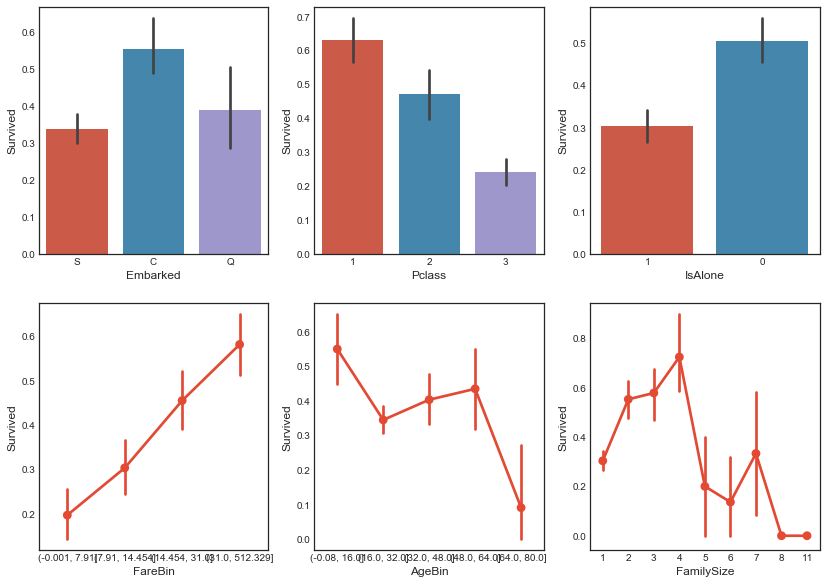

In [22]:
fig,saxis = plt.subplots(2,3,figsize=(14,10))

sns.barplot(x='Embarked',y='Survived',data = data1 ,ax = saxis[0,0])
sns.barplot(x='Pclass',y='Survived',order=[1,2,3],data = data1,ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin',y='Survived',data = data1,ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

#### 5.4 定向分析特征

通过前面表格我们知道PClass对结果的影响较大，现在对PClass定向分析。

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

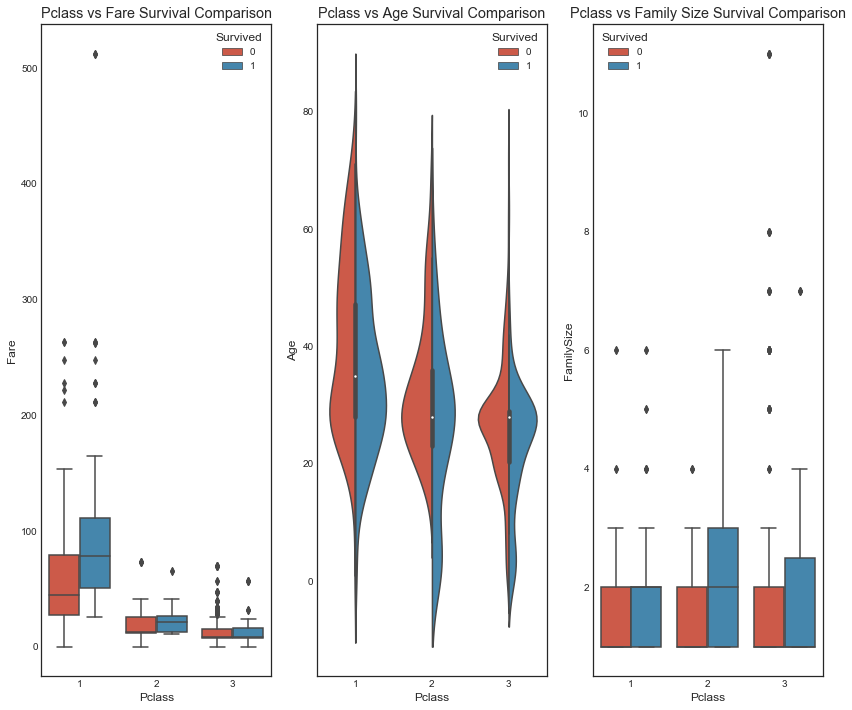

In [23]:
fig,axis1 = plt.subplots(1,3,figsize = (14,12))
#对比Pclass与其他特征的关联性
sns.boxplot(x='Pclass',y='Fare',hue = 'Survived',data = data1,ax = axis1[0])
axis1[0].set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass',y='Age',hue = 'Survived',data = data1,split = True,ax = axis1[1])
axis1[1].set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass',y='FamilySize',hue = 'Survived',data = data1,ax = axis1[2])
axis1[2].set_title('Pclass vs Family Size Survival Comparison')

通过前面表格我们知道Sex对结果的影响较大，现在对Sex定向分析

Text(0.5,1,'Sex vs IsAlone Survival Comparison')

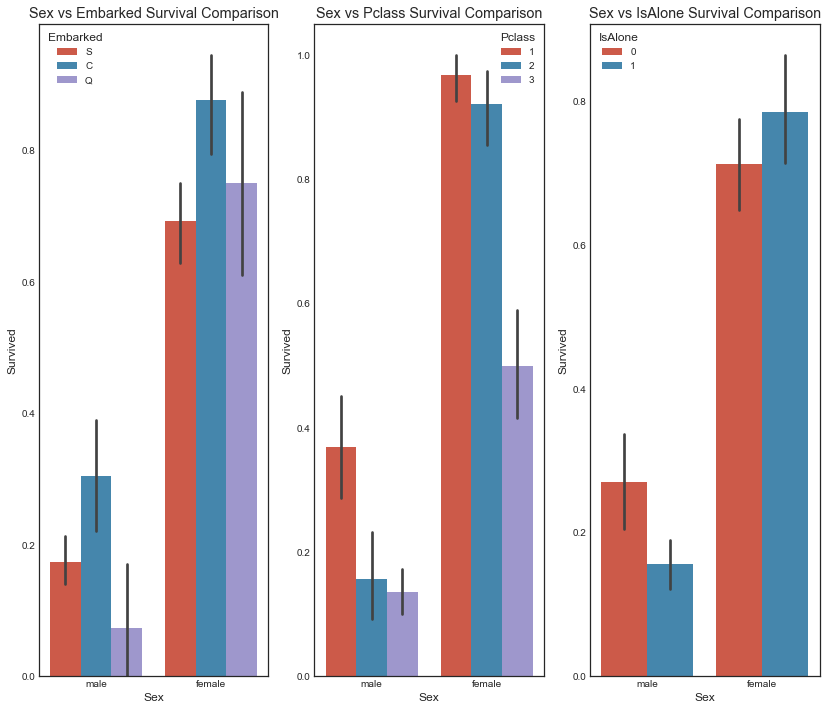

In [24]:
fig,qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex',y ='Survived',hue = 'Embarked',data = data1, ax=qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
qaxis[2].set_title('Sex vs IsAlone Survival Comparison')


#### 5.5 更多并排比较

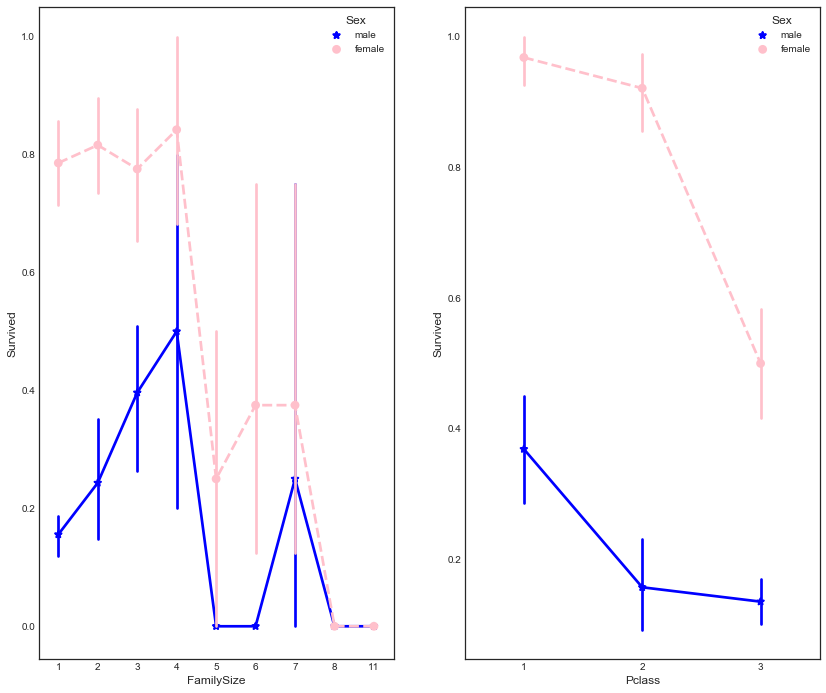

In [25]:
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

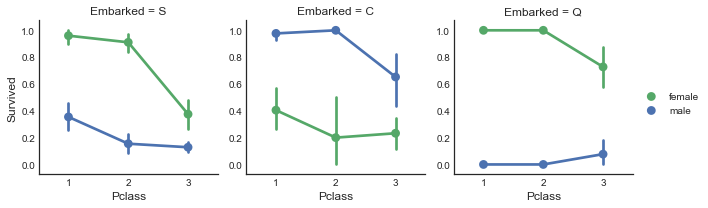

In [26]:
#分别比较不同Embarked，Pclass，Sex，与Survived的关系。
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

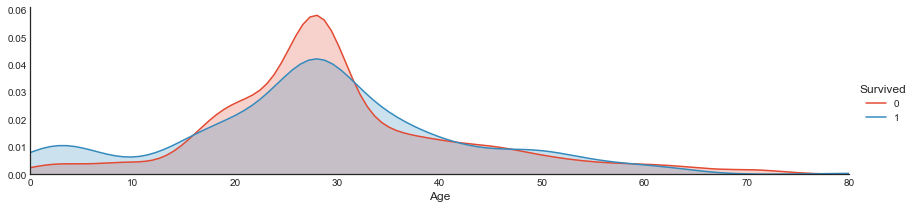

In [27]:
#生存下来与为生存下来的乘客年龄分布情况
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

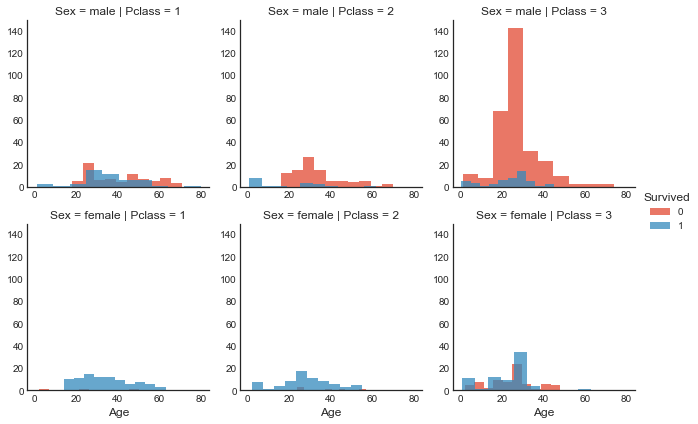

In [28]:
#Sex,Pclass与Survived的关系
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

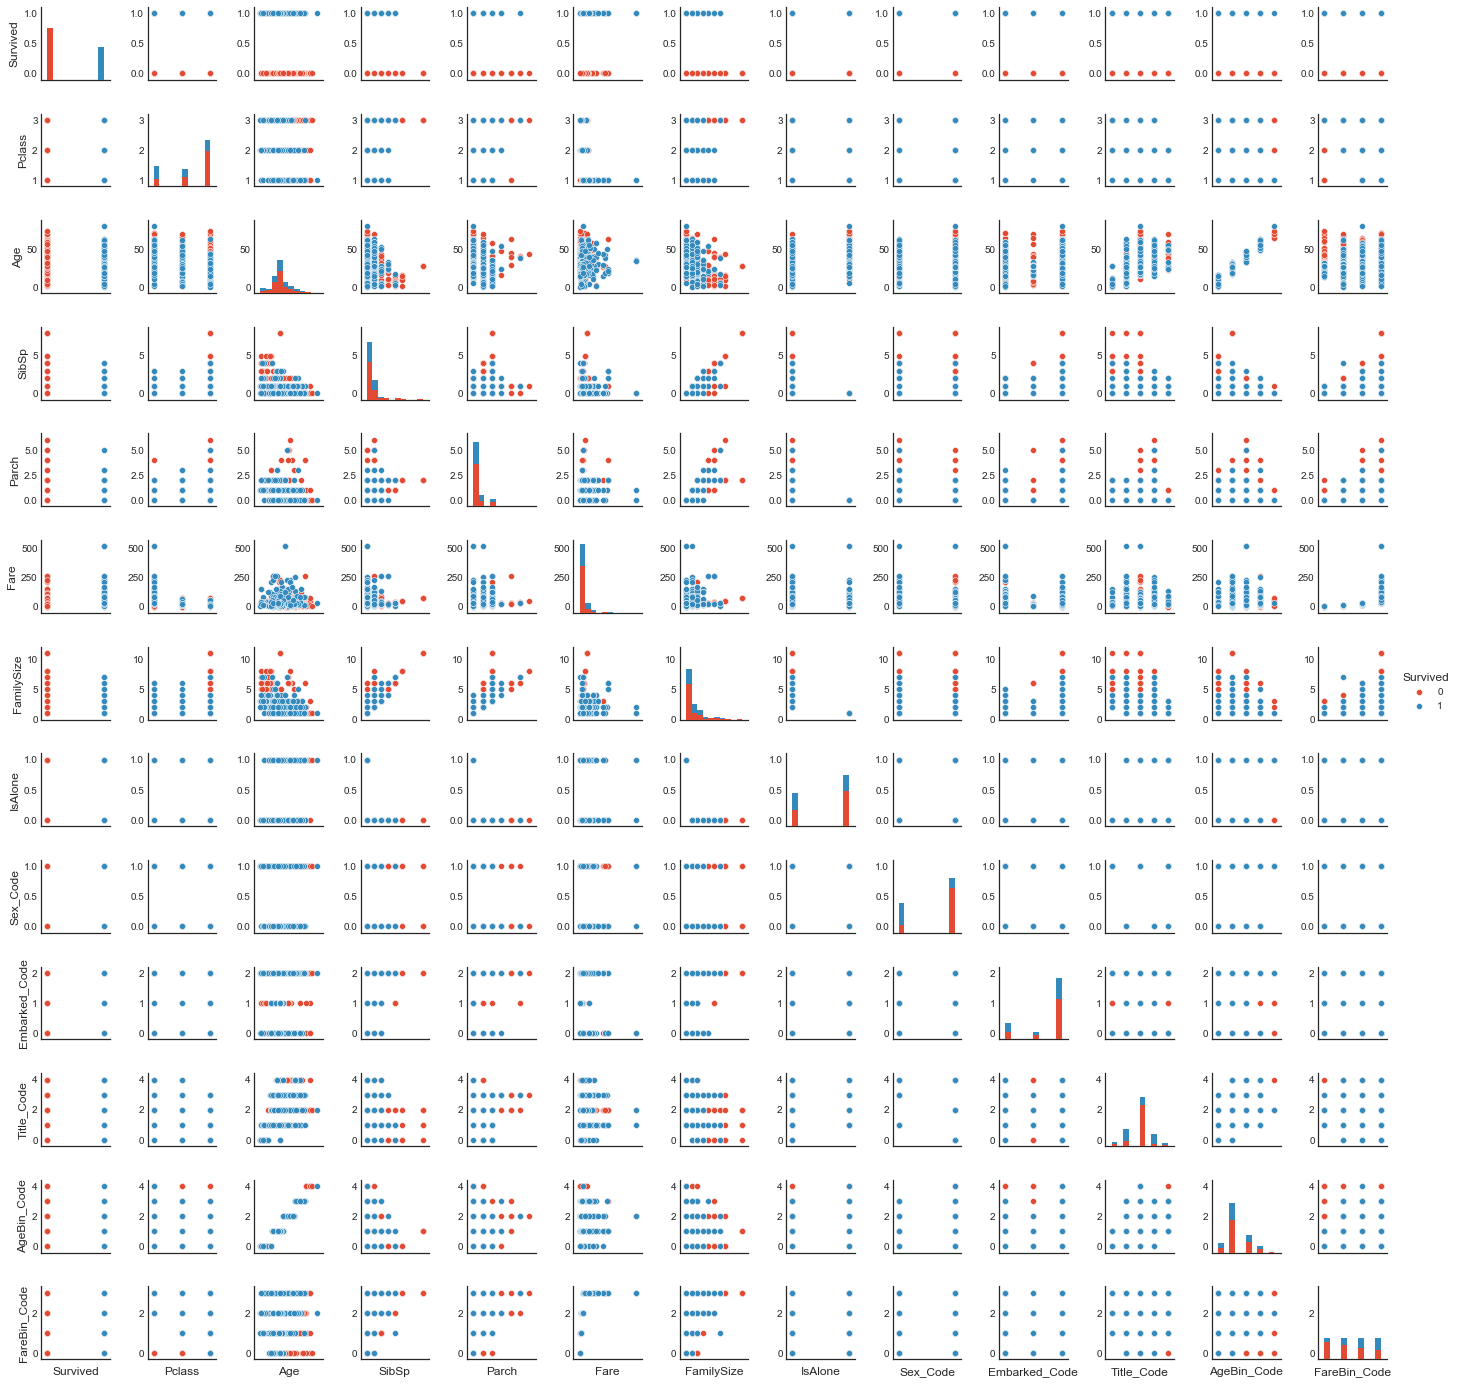

In [29]:
#在整个数据集上分析特征之间相关性
pp=sns.pairplot(data1,hue='Survived',size =1.5)
pp.set(xticklabels=[])

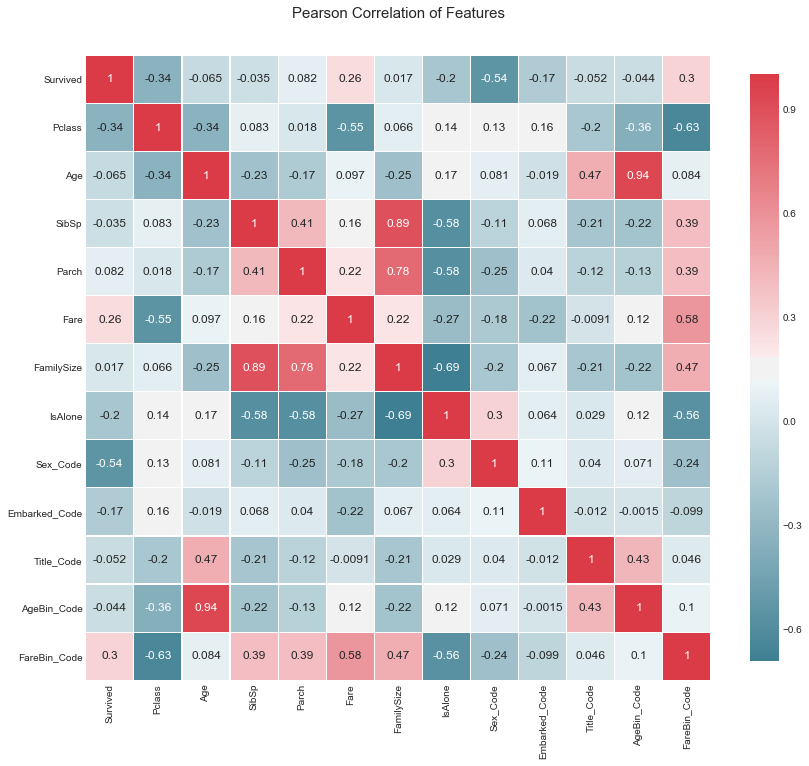

In [30]:
#热力分析图
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(data1)

### 6.机器学习算法的选择和初始化

In [31]:
MLA = [
    #集成方法
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    ensemble.ExtraTreesClassifier(),
    
    #高斯过程
    gaussian_process.GaussianProcessClassifier(),
    
    #线性模型
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #贝叶斯
    naive_bayes.GaussianNB(),
    naive_bayes.BernoulliNB(),
    
    #近邻算法
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    svm.NuSVC(),
    
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #判别分析
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #XGBoost
    XGBClassifier()
]

#### 6.1使用拆分器交叉验证数据集

In [32]:
#这是train_test_split的替代方案
cv_split = model_selection.ShuffleSplit(n_splits=10,test_size=.3,train_size=.6,random_state=0)

#### 6.2创建一个表来比较MLA指标

In [33]:
MLA_columns = ['MLA_Name','MLA_Parameters','MLA Train Accuracy Mean','MLA Test Accuracy Mean','MLA Test Accuracy 3*STD','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#### 6.3创建一个表来比较MLA预测

In [34]:
MLA_predict = data1[Target]

#### 6.4通过MLA索引并将表现保存到表格

In [35]:
row_index = 0
for alg in MLA:
    #设置名字和参数。
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA_Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    #交叉验证得分模型。
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)
    
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    
    #保存预测值
    alg.fit(data1[data1_x_bin],data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index +=1

#### 6.5查看MLA的模型效果

In [36]:
#查看效果
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending= False ,inplace=True)
MLA_compare

,MLA_Name,MLA_Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,MLA Parameters
21,XGBClassifier,NaN,0.856367,0.827239,0.0430788,0.0389997,"{'base_score': 0.5, 'booster': 'gbtree', 'cols..."
14,SVC,NaN,0.839139,0.826866,0.0439856,0.0655197,"{'C': 1.0, 'cache_size': 200, 'class_weight': ..."
16,NuSVC,NaN,0.836517,0.826119,0.0470149,0.0171598,"{'cache_size': 200, 'class_weight': None, 'coe..."
17,DecisionTreeClassifier,NaN,0.895131,0.822388,0.0555657,0,"{'class_weight': None, 'criterion': 'gini', 'm..."
1,BaggingClassifier,NaN,0.890824,0.821642,0.066376,0.0241999,"{'base_estimator': None, 'bootstrap': True, 'b..."
2,GradientBoostingClassifier,NaN,0.867041,0.821642,0.0517353,0.125839,"{'criterion': 'friedman_mse', 'init': None, 'l..."
4,ExtraTreesClassifier,NaN,0.895131,0.820522,0.0657405,0.0202799,"{'bootstrap': False, 'class_weight': None, 'cr..."
13,KNeighborsClassifier,NaN,0.849625,0.819776,0.0631347,0.00156002,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
3,RandomForestClassifier,NaN,0.891199,0.818284,0.0770764,0.0311998,"{'bootstrap': True, 'class_weight': None, 'cri..."
18,ExtraTreeClassifier,NaN,0.895131,0.81194,0.0664514,0.00311995,"{'class_weight': None, 'criterion': 'gini', 'm..."


Text(0.5,1,'Machine Learning Algorithm Accuracy Score \n')

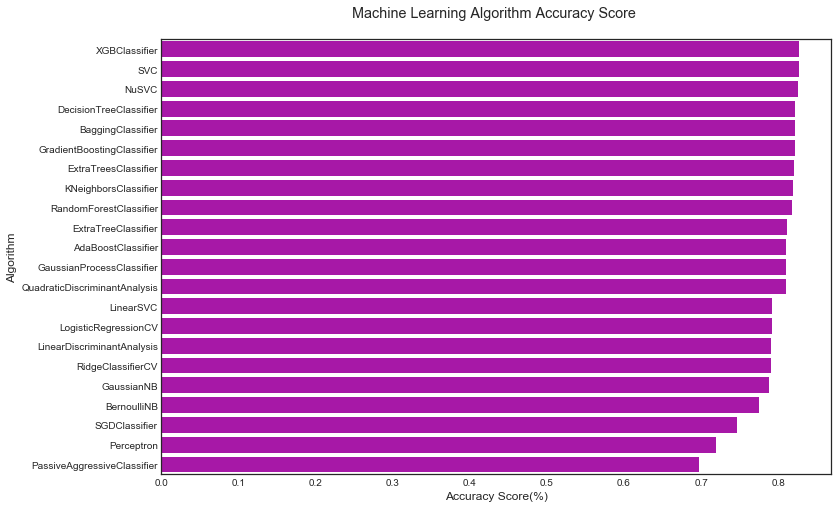

In [37]:
#通过图表查看效果
sns.barplot(x='MLA Test Accuracy Mean',y='MLA_Name',data=MLA_compare,color='m')
plt.xlabel('Accuracy Score(%)')
plt.ylabel('Algorithm')
plt.title('Machine Learning Algorithm Accuracy Score \n')

随机猜

In [38]:
for index,row in data1.iterrows():
    if random.random()>0.5:
        data1.set_value(index,'Random_Predict',1)
    else:
        data1.set_value(index,'Random_Predict',0)

data1['Random_Score'] = 0
data1.loc[(data1['Survived']==data1['Random_Predict']),'Random_Score'] = 1
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))

Coin Flip Model Accuracy: 47.36%
Coin Flip Model Accuracy w/SciKit: 47.36%


按性别分组

In [39]:
pivot_female = data1[data1.Sex=='female'].groupby(['Sex','Pclass','Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)
pivot_male = data1[data1.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000


In [40]:
def mytree(df):
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master']
    for index,row in df.iterrows():
        Model.loc[index,'Predict'] = 0
        #根据性别分类
        if(df.loc[index,'Sex']=='female'):
            Model.loc[index,'Predict'] = 1
        #在女性节点决策树中挑选出生存小于0.5的值，设置为0
        if((df.loc[index,'Sex']=='female') & (df.loc[index,'Pclass']==3) & (df.loc[index,'Embarked']=='S') & (df.loc[index,'Fare']>8)):
            Model.loc[index,'Predict'] = 0
        #在男性节点决策树中挑选出生存大于0.5d的值，设置为1
        if((df.loc[index,'Sex']=='male') & (df.loc[index,'Title'] in male_title)):
            Model.loc[indes,'Predict'] = 1
    return Model

Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))

Decision Tree Model Accuracy/Precision Score: 81.37%



通过绘图来准确性总结

Normalized confusion matrix
[[ 0.94  0.06]
 [ 0.38  0.62]]


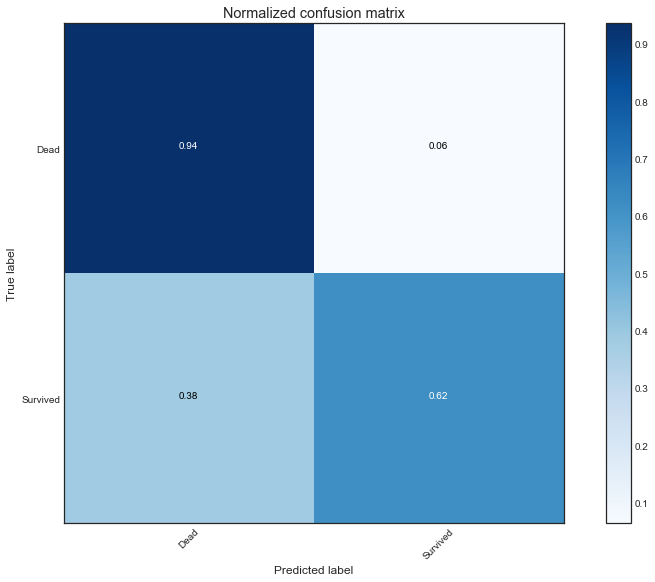

In [41]:
"""
这个函数可以打印并绘制混淆矩阵，归一化可以通过设置normalize = True来应用
"""
import itertools
def plot_confusion_matrix(cm,classes,normalize = False,title='Counfusion matrix',cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes) 

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#计算混淆矩阵
cnf_matrix = metrics.confusion_matrix(data1['Survived'],Tree_Predict)
np.set_printoptions(precision=2)
class_names = ['Dead','Survived']
plt.figure()

#未归一化的混淆矩阵
# plot_confusion_matrix(cnf_matrix,class_names,title='Confusion matrix, without normalization')
#归一化之后的混淆矩阵
plot_confusion_matrix(cnf_matrix,class_names,normalize=True,title='Normalized confusion matrix')

### 7.交叉验证，超参调整

In [42]:
#使用基础模型预测
dtree = tree.DecisionTreeClassifier(random_state=0)
base_results = model_selection.cross_validate(dtree,data1[data1_x_bin],data1[Target],cv=cv_split)
dtree.fit(data1[data1_x_bin],data1[Target])
print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

param_grid={'criterion':['gini','entropy'],'max_depth': [2,4,6,8,10,None],'random_state':[0]}

#所有超参可能的组合
#print(list(model_selection.ParameterGrid(param_grid)))

BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.05
BEFORE DT Test w/bin score 3*std: +/- 5.70


In [43]:
base_results 

{'fit_time': array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01]),
 'score_time': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 'test_score': array([ 0.83,  0.82,  0.82,  0.82,  0.82,  0.82,  0.82,  0.8 ,  0.78,  0.86]),
 'train_score': array([ 0.89,  0.9 ,  0.9 ,  0.89,  0.89,  0.9 ,  0.9 ,  0.9 ,  0.9 ,  0.88])}

#### 7.1使用GridSearchCV选择最佳模型

In [44]:
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid,scoring='roc_auc',cv=cv_split)
tune_model.fit(data1[data1_x_bin],data1[Target])

print('AFTER DT Parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))


AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.41
AFTER DT Test w/bin score mean: 87.63
AFTER DT Test w/bin score 3*std: +/- 6.44


In [45]:
#使用最佳模型预测效果
tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

print('AFTER DT Parameters: ', tune_model.best_params_)
print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))

AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin set score mean: 89.36
AFTER DT Test w/bin set score mean: 87.56
AFTER DT Test w/bin set score min: 84.73


#### 7.2根据特征调整模型

In [46]:
#基础模型
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.05
BEFORE DT RFE Test w/bin score 3*std: +/- 5.70


In [47]:
#特征选择
dtree_rfe = feature_selection.RFECV(dtree,step =1,scoring='accuracy',cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin],data1[Target])

X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree,data1[X_rfe],data1[Target],cv = cv_split)

print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))

AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code' 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 82.99
AFTER DT RFE Test w/bin score 3*std: +/- 6.28


In [48]:
#利用选择好的特征进行超差调整
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid,scoring='roc_auc',cv = cv_split)
rfe_tune_model.fit(data1[X_rfe],data1[Target])

print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][rfe_tune_model.best_index_]*100)) 
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][rfe_tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][rfe_tune_model.best_index_]*100*3))

AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.43
AFTER DT RFE Tuned Test w/bin score mean: 87.44
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.69


### 8.验证和实现

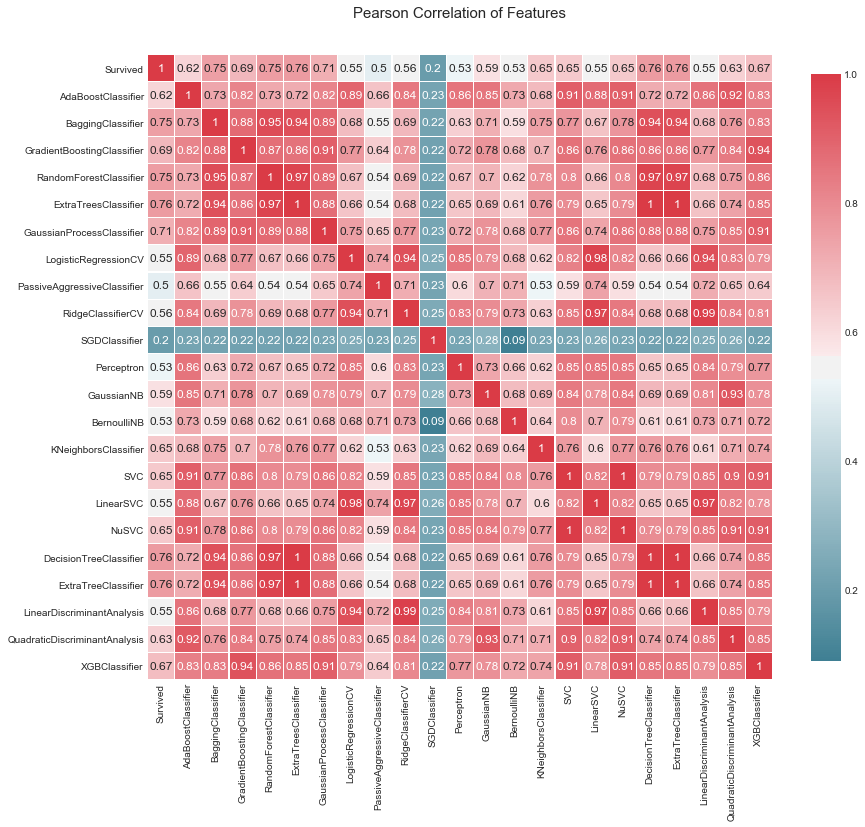

In [49]:
#观察不同算法之间的相关性
correlation_heatmap(MLA_predict)

#### 8.1利用投票分类器来选择模型

In [50]:
vote_est = [
    #集成方法: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    #高斯过程: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    #回归: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    #贝叶斯: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]

In [51]:
#多数投票规则选举
vote_hard = ensemble.VotingClassifier(estimators=vote_est,voting='hard')
vote_hard_cv = model_selection.cross_validate(vote_hard,data1[data1_x_bin],data1[Target],cv = cv_split)
vote_hard.fit(data1[data1_x_bin],data1[Target])


print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))

Hard Voting Training w/bin score mean: 86.55
Hard Voting Test w/bin score mean: 82.69
Hard Voting Test w/bin score 3*std: +/- 4.78


In [52]:
#概率加权平均规则
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Soft Voting Training w/bin score mean: 87.15
Soft Voting Test w/bin score mean: 82.39
Soft Voting Test w/bin score 3*std: +/- 4.82
----------


#### 8.2计算各个模型的训练时间

In [53]:
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],

            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]

In [61]:
start_total = time.perf_counter()
for clf,param in zip(vote_est,grid_param):
    start = time.perf_counter()
    best_search = model_selection.GridSearchCV(estimator=clf[1],param_grid=param,cv=cv_split,scoring='roc_auc')
    best_search.fit(data1[data1_x_bin],data1[Target])
    run = time.perf_counter() - start
    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param)

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

The best parameter for AdaBoostClassifier is {'learning_rate': 0.25, 'n_estimators': 100, 'random_state': 0} with a runtime of 69.32 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 62.58 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300, 'random_state': 0} with a runtime of 138.86 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 77.10 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50, 'oob_score': True, 'random_state': 0} with a runtime of 162.92 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 149.90 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_sta

### 提交答案

In [64]:
data_val['Survived'] = vote_hard.predict(data_val[data1_x_bin])
submit = data_val[['PassengerId','Survived']]
submit.to_csv("input/submit.csv", index=False)